In [ ]:
import numpy as np
import pandas as pd
import requests
from scipy.stats import norm, chi2, genpareto
import matplotlib.pyplot as plt
from arch import arch_model
%matplotlib inline

In [52]:
# import os
# root='./data/'
# file_name = os.listdir(root)
# print(file_name)
# stock = pd.DataFrame()
# for i in file_name:  # 将文件夹数据整合成一个大的DataFrame
#     tmp_df = pd.read_excel(root+i)
#     stock = pd.concat([stock,tmp_df])
# stock.columns=[['date','close']]
# stock.dropna(inplace=True)
# stock['date']=pd.to_datetime(stock['date'])
stock = pd.read_excel('1.xlsx')
for i in range(3):
    filename=str(i+2)+'.xlsx'
    tmp=pd.read_excel(filename)
    stock=pd.concat([stock,tmp])
stock

date  close
0    2004-05-24   8.86
1    2004-05-25   8.78
2    2004-05-26   8.91
3    2004-05-27   9.02
4    2004-05-28   8.93
..          ...    ...
541  2023-03-27  20.32
542  2023-03-28  20.18
543  2023-03-29  20.72
544  2023-03-30  21.22
545  2023-03-31  21.25

[4749 rows x 2 columns]

In [53]:
stock['date']=pd.to_datetime(stock['date'],format='%Y-%m-%d')
stock

date  close
0   2004-05-24   8.86
1   2004-05-25   8.78
2   2004-05-26   8.91
3   2004-05-27   9.02
4   2004-05-28   8.93
..         ...    ...
541 2023-03-27  20.32
542 2023-03-28  20.18
543 2023-03-29  20.72
544 2023-03-30  21.22
545 2023-03-31  21.25

[4749 rows x 2 columns]

In [54]:
data=stock
data['dret1']=np.log(data['close'])-np.log(data['close'].shift(periods=1))
data



date  close     dret1
0   2004-05-24   8.86       NaN
1   2004-05-25   8.78 -0.009070
2   2004-05-26   8.91  0.014698
3   2004-05-27   9.02  0.012270
4   2004-05-28   8.93 -0.010028
..         ...    ...       ...
541 2023-03-27  20.32 -0.022385
542 2023-03-28  20.18 -0.006914
543 2023-03-29  20.72  0.026407
544 2023-03-30  21.22  0.023845
545 2023-03-31  21.25  0.001413

[4749 rows x 3 columns]

In [55]:
data.dropna(inplace=True)
data

date  close     dret1
1   2004-05-25   8.78 -0.009070
2   2004-05-26   8.91  0.014698
3   2004-05-27   9.02  0.012270
4   2004-05-28   8.93 -0.010028
5   2004-05-31   8.95  0.002237
..         ...    ...       ...
541 2023-03-27  20.32 -0.022385
542 2023-03-28  20.18 -0.006914
543 2023-03-29  20.72  0.026407
544 2023-03-30  21.22  0.023845
545 2023-03-31  21.25  0.001413

[4217 rows x 3 columns]

In [60]:
# 开始计算 ES 值
'''
输入：
    a:每日收益率
    x:置信度
输出：
    ES
'''
def ES_Daily(a,x):
    VaR=np.percentile(a,(1-x)*100)
    ES=a[a<=VaR].mean()
    return ES
#print('99%置信水平下的ES为{:.2f}'.format(\
#ES_daily(df1.rev_rate,0.99)))

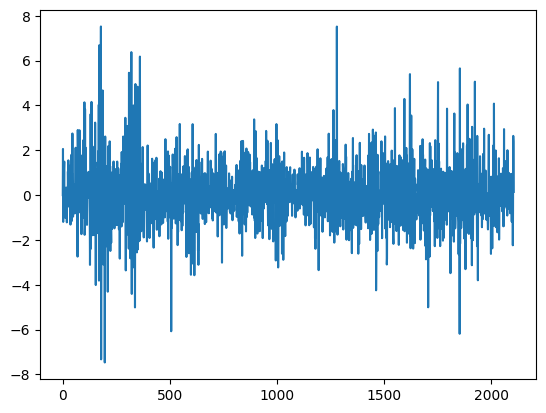

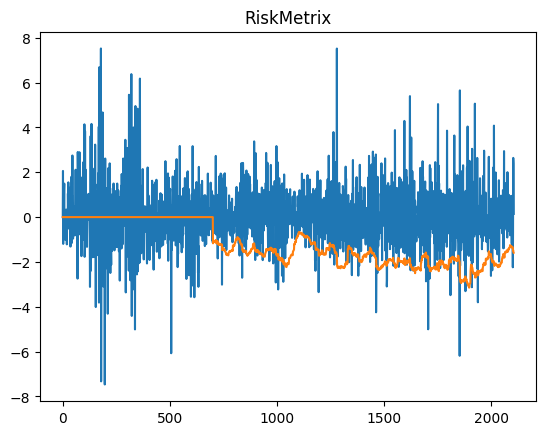

array([<class 'numpy.ndarray'>, -1.210484932498875, -1.210484932498875,
       ..., -1.6643348589734597, -1.6643348589734597, -1.6643348589734597],
      dtype=object)

In [63]:

CVaR_RM=np.ndarray
ind=data['dret1']>=-0.1
tmp = data[data['date'] >= pd.to_datetime('2014-01-01', format='%Y-%m-%d')]
tmp=tmp[tmp['dret1']>=-0.1]
tmp=tmp[tmp['dret1']<=0.1]
tmp
r=tmp[tmp['date'] >= pd.to_datetime('2014-01-01', format='%Y-%m-%d')]['dret1'].values*100
plt.plot(r)
plt.show()
l = np.fix(len(r)/3).astype(int)
VaR_RM = np.zeros(len(r))
qalpha = norm.ppf(0.05)
for i in range(l, len(r)):
    mhat, shat = norm.fit(r[i-50:i])
    VaR_RM[i] = -(mhat + qalpha*shat)
    CVaR_RM=np.append(CVaR_RM,ES_Daily(r[i-50:i],0.95))
plt.plot(r)
plt.plot(VaR_RM*-1)
plt.title('RiskMetrix')
plt.savefig('riskmetrics.jpg')
plt.show()
CVaR_RM

In [64]:
CVaR_RM=CVaR_RM[1:]
CVaR_RM

array([-1.210484932498875, -1.210484932498875, -1.210484932498875, ...,
       -1.6643348589734597, -1.6643348589734597, -1.6643348589734597],
      dtype=object)

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4264.819204748153
Iteration:      2,   Func. Count:     21,   Neg. LLF: 31910517259.674194
Iteration:      3,   Func. Count:     31,   Neg. LLF: 1845.05378035389
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4683.682167541429
Iteration:      5,   Func. Count:     51,   Neg. LLF: 1484.5091331784624
Iteration:      6,   Func. Count:     61,   Neg. LLF: 1241.9249128843894
Iteration:      7,   Func. Count:     70,   Neg. LLF: 1214.7106321519886
Iteration:      8,   Func. Count:     79,   Neg. LLF: 1223.5555550521506
Iteration:      9,   Func. Count:     88,   Neg. LLF: 1210.7052333076556
Iteration:     10,   Func. Count:     97,   Neg. LLF: 1208.823309511981
Iteration:     11,   Func. Count:    106,   Neg. LLF: 1208.7585189245979
Iteration:     12,   Func. Count:    114,   Neg. LLF: 1208.7526425885753
Iteration:     13,   Func. Count:    122,   Neg. LLF: 1208.7525376251183
Iteration:     14,   Func. Count:    130,   Neg. LLF: 12

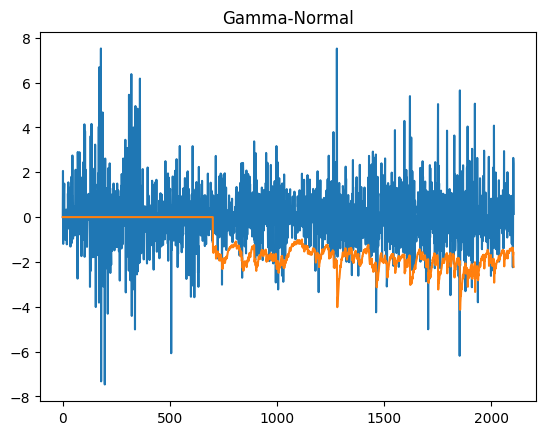

array([ 1.25811488,  1.22262724,  1.21055656, ..., -1.66433486,
       -1.66433486, -1.66433486])

In [65]:
l = np.fix(len(r)/3).astype(int)
VaR_GN = np.zeros(len(r))
qalpha = norm.ppf(0.05)
for i in range(l, len(r)):
    # am_ar_garch = arch_model(r[:i], mean='ar', lags=1, vol='garch', dist='normal', p=2, q=2)
    am_ar_garch = arch_model(r[:i], mean='ar', lags=1, vol='garch', dist='normal', p=2, q=2)
    res_ar_garch = am_ar_garch.fit()
    a = res_ar_garch.forecast(horizon=1, align='origin',reindex=False)
    mu = a.mean['h.1'].iloc[-1]
    sigma = a.variance['h.1'].iloc[-1]
    VaR_GN[i] = -(mu + qalpha * np.sqrt(sigma))
    CVaR_GN=np.append(CVaR_GN,ES_Daily(r[i-50:i],0.95))
plt.plot(r)
plt.plot(VaR_GN*-1)
plt.title('Gamma-Normal')
plt.savefig('3.png')
plt.show()
CVaR_GN=CVaR_GN[1:]
CVaR_GN

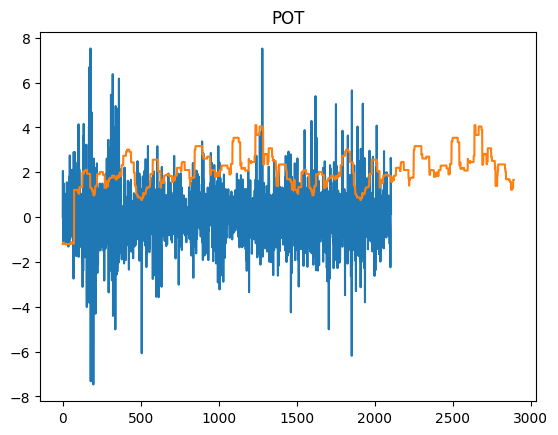

In [68]:
l = np.fix(len(r)/3).astype(int)
VaR_EVT = np.zeros(len(r))
alpha = 0.05
for i in range(l, len(r)):
    his_sample = r[i-200:i]
    his_sample = np.sort(his_sample)
    ind = np.ceil(len(his_sample)*0.1).astype(int)
    evt_sample = np.abs(his_sample[:ind])
    u = evt_sample[-1]
    evt_sample = evt_sample - u
    evt_sample = np.delete(evt_sample, -1)

    n = len(his_sample)
    Nu = len(evt_sample)

    parmhat = genpareto.fit(evt_sample, floc=0)
    kHat = parmhat[0]; # Tail index parameter
    sigmaHat = parmhat[2]; # Scale parameter
    VaR_EVT[i] = u + sigmaHat / kHat * ((alpha * n / Nu) ** -kHat - 1)
    CVaR_EVT=np.append(CVaR_EVT,ES_Daily(r[i-50:i],0.95))
plt.plot(r)
plt.title('POT')


CVaR_EVT=CVaR_EVT[1:]
CVaR_EVT
plt.plot(CVaR_EVT*-1)
plt.show()

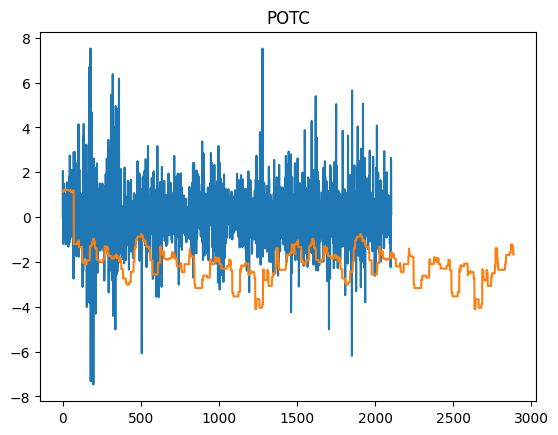

In [70]:
plt.plot(r)
plt.title('POTC')


CVaR_EVT=CVaR_EVT[1:]
CVaR_EVT
plt.plot(CVaR_EVT)
plt.show()

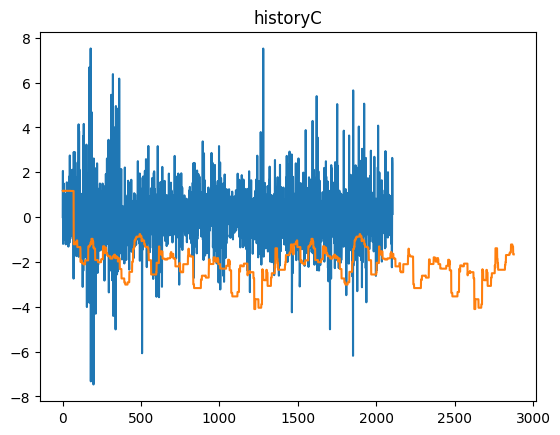

array([ 1.17121559,  1.15358165,  1.15358165, ..., -1.66433486,
       -1.66433486, -1.66433486])

In [76]:
# 历史模拟方法
l = np.fix(len(r)/3).astype(int)
VaR_HS = np.zeros(len(r))
qalpha = int(200*0.05)
for i in range(l, len(r)):
    his_sample = r[i-200:i]
    his_sample = np.sort(his_sample)
    VaR_HS[i] = -his_sample[qalpha-1]
    CVaR_HS=np.append(CVaR_HS,ES_Daily(r[i-50:i],0.95))
plt.plot(r)
plt.title('historyC')
CVaR_HS=CVaR_HS[1:]
plt.plot(CVaR_HS)
plt.show()
CVaR_HS

In [32]:
data = pd.DataFrame({'return': r, 'VaR_RM': VaR_RM, 'VaR_GN': VaR_GN, 'VaR_HS': VaR_HS, 'VaR_EVT': VaR_EVT})
data.to_csv('Data_VaR.csv')

In [33]:
def myfun_Kupiec(r, VaR, pstar):
    N = np.sum(r > VaR)
    T = len(r)
    LRuc = -2*((T-N)*np.log(1-pstar)+N*np.log(pstar)) + 2*((T-N)*np.log(1-N/T)+N*np.log(N/T))
    pvalue_LRuc = 1 - chi2.cdf(LRuc, 1)
    return LRuc, pvalue_LRuc

def myfun_Christoffersen(r, VaR):
    ind = r > VaR
    ind1 = ind[:-1]
    ind2 = ind[1:]
    n00 = np.sum((ind1==0) & (ind2==0))
    n01 = np.sum((ind1==0) & (ind2==1))
    n10 = np.sum((ind1==1) & (ind2==0))
    n11 = np.sum((ind1==1) & (ind2==1))

    Pi01 = n01/(n01+n00)
    Pi11 = n11/(n10+n11)
    Pi2 = (n01+n11)/(n00+n01+n10+n11)

    LRind = (n00+n10)*np.log(1-Pi2) + (n01+n11)*np.log(Pi2) - \
            n00*np.log(1-Pi01) - n01*np.log(Pi01) - n10*np.log(1-Pi11) - n11*np.log(Pi11)
    LRind = LRind*-2
    pvalue_LRind = 1 - chi2.cdf(LRind, 1)
    return LRind, pvalue_LRind

def myfun_Kupiec_Christoffersen(LRuc, LRind):
    LRcc = LRuc + LRind
    pvalue_LRcc = 1 - chi2.cdf(LRcc, 2)
    return LRcc, pvalue_LRcc

data = pd.read_csv('Data_VaR.csv')
ind = data['VaR_RM'] > 0
r = data.loc[ind, ['return']].values*-1
VaR_RM = data.loc[ind, ['VaR_RM']].values
VaR_GN = data.loc[ind, ['VaR_GN']].values
VaR_HS = data.loc[ind, ['VaR_HS']].values
VaR_EVT = data.loc[ind, ['VaR_EVT']].values

pstar = 0.05;
[LRuc_RM, pvalue_LRuc_RM] = myfun_Kupiec(r, VaR_RM, pstar)
[LRind_RM, pvalue_LRind_RM] = myfun_Christoffersen(r, VaR_RM)
[LRcc_RM, pvalue_LRcc_RM] = myfun_Kupiec_Christoffersen(LRuc_RM, LRind_RM)

[LRuc_GN, pvalue_LRuc_GN] = myfun_Kupiec(r, VaR_GN, pstar)
[LRind_GN, pvalue_LRind_GN] = myfun_Christoffersen(r, VaR_GN)
[LRcc_GN, pvalue_LRcc_GN] = myfun_Kupiec_Christoffersen(LRuc_GN, LRind_GN)

[LRuc_HS, pvalue_LRuc_HS] = myfun_Kupiec(r, VaR_HS, pstar)
[LRind_HS, pvalue_LRind_HS] = myfun_Christoffersen(r, VaR_HS)
[LRcc_HS, pvalue_LRcc_HS] = myfun_Kupiec_Christoffersen(LRuc_HS, LRind_HS)

[LRuc_EVT, pvalue_LRuc_EVT] = myfun_Kupiec(r, VaR_EVT, pstar)
[LRind_EVT, pvalue_LRind_EVT] = myfun_Christoffersen(r, VaR_EVT)
[LRcc_EVT, pvalue_LRcc_EVT] = myfun_Kupiec_Christoffersen(LRuc_EVT, LRind_EVT)


print('{:12s}, {:>12s}, {:>12s}, {:>12s}, {:>12s}, {:>12s}, {:>12s}'.format('', 'LRuc', 'pLRuc', 'LRind', 'pLRind', 'LRcc', 'pLRcc'))
print('{:12s}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}'.format('RiskMetrics', LRuc_RM, pvalue_LRuc_RM, LRind_RM, pvalue_LRind_RM, LRcc_RM, pvalue_LRcc_RM))
print('{:12s}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}'.format('GarchNormal', LRuc_GN, pvalue_LRuc_GN, LRind_GN, pvalue_LRind_GN, LRcc_GN, pvalue_LRcc_GN))
print('{:12s}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}'.format('HisSim', LRuc_HS, pvalue_LRuc_HS, LRind_HS, pvalue_LRind_HS, LRcc_HS, pvalue_LRcc_HS))
print('{:12s}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}'.format('EVT GPD', LRuc_EVT, pvalue_LRuc_EVT, LRind_EVT, pvalue_LRind_EVT,LRcc_EVT, pvalue_LRcc_EVT))

            ,         LRuc,        pLRuc,        LRind,       pLRind,         LRcc,        pLRcc
RiskMetrics ,       0.2129,       0.6445,       0.3184,       0.5726,       0.5313,       0.7667
GarchNormal ,       1.9841,       0.1590,       0.1114,       0.7385,       2.0955,       0.3507
HisSim      ,       0.0006,       0.9805,       0.0804,       0.7767,       0.0810,       0.9603
EVT GPD     ,       0.1161,       0.7333,       0.1998,       0.6549,       0.3159,       0.8539


In [38]:
# 开始计算 ES 值
'''
输入：
    a:每日收益率
    x:置信度
输出：
    ES
'''
def ES_Daily(a,x,VaR):
    VaR=np.percentile(a,(1-x)*100)
    ES=a[a<=VaR]
    return ES
#print('99%置信水平下的ES为{:.2f}'.format(\
#ES_daily(df1.rev_rate,0.99)))


In [39]:
CVaR_RM=[]
for i in VaR_RM:
    CVaR_RM.append(ES_Daily(r,0.95,i))


array([0.97297302, 0.9302322 , 0.89207859, 0.90181125, 0.92022444,
       0.93471851, 0.95892549, 0.94213448, 0.94633394, 0.96901933,
       0.94164579, 0.92332019, 0.92003337, 0.92749758, 0.9100682 ,
       0.84072198, 0.84976179, 0.82608622, 0.81773092, 0.76474759,
       0.72375941, 0.67883222, 0.66562092, 0.6641196 , 0.67557382,
       0.67470042, 0.69428275, 0.72558217, 0.74602514, 0.74118591,
       0.73441951, 0.72580607, 0.69829781, 0.71026398, 0.70868405,
       0.70675034, 0.71155511, 0.79298947, 0.7949811 , 0.7972258 ,
       0.79970013, 0.76706113, 0.77014325, 0.79702909, 0.80287638,
       0.79198379, 0.84264022, 0.88244934, 0.88720066, 0.89255448,
       0.89044482, 0.87661484, 0.86428774, 0.84936024, 0.9236388 ,
       0.92156879, 0.90979148, 0.85308419, 0.83454019, 0.83423641,
       0.88246412, 0.88027945, 0.8620341 , 0.88919068, 0.8939279 ,
       0.89438835, 0.88909021, 0.91072811, 0.91602204, 0.93103164,
       0.94397344])

In [40]:
VaR_RM

array([[1.16980938],
       [1.14444209],
       [1.11957228],
       ...,
       [1.48539336],
       [1.56339199],
       [1.58864841]])

In [41]:
CVaR_GN=ES_Daily(VaR_GN,0.95)
CVaR_GN

array([1.25709594, 1.25811488, 1.22262724, 1.21055656, 1.22999437,
       1.20255328, 1.16752694, 1.13245131, 1.1608019 , 1.11539002,
       1.08627828, 1.15897652, 1.25580166, 1.24522051, 1.24742256,
       1.2146236 , 1.1951352 , 1.24411135, 1.23799376, 1.25977955,
       1.2245285 , 1.17994687, 1.17638623, 1.13166948, 1.10055038,
       1.23499227, 1.18634724, 1.16689325, 1.15845975, 1.1247952 ,
       1.12707837, 1.20425582, 1.21166005, 1.16825368, 1.14748577,
       1.10055899, 1.09178116, 1.08108667, 1.06058088, 1.02308418,
       1.16545668, 1.16270362, 1.18073152, 1.13628613, 1.09911574,
       1.09500234, 1.07047088, 1.02327924, 1.0832062 , 1.19162409,
       1.1573186 , 1.1640375 , 1.17814575, 1.13718786, 1.12355993,
       1.10450634, 1.05113211, 1.05743689, 1.03917085, 0.99813646,
       1.24047241, 1.2046271 , 1.20923966, 1.26661847, 1.24794389,
       1.26206407, 1.2607507 , 1.23414332, 1.2387807 , 1.25527425,
       1.23759169])

In [42]:
CVaR_HS=ES_Daily(VaR_HS,0.95)
CVaR_HS

array([1.17121559, 1.17121559, 1.17121559, 1.15358165, 1.15358165,
       1.15358165, 1.15358165, 1.17121559, 1.17121559, 1.17121559,
       1.17121559, 1.17121559, 1.17121559, 1.17121559, 1.17121559,
       1.17121559, 1.17121559, 1.17121559, 1.17121559, 1.17121559,
       1.17121559, 1.17121559, 1.17121559, 1.17121559, 1.17121559,
       1.17121559, 1.17121559, 1.17121559, 1.17121559, 1.17121559,
       1.17121559, 1.17121559, 1.17121559, 1.17121559, 1.17121559,
       1.17121559, 1.17121559, 1.17121559, 1.17121559, 1.17121559,
       1.17121559, 1.17121559, 1.17121559, 1.17121559, 1.17121559,
       1.17121559, 1.17121559, 1.17121559, 1.17143081, 1.17143081,
       1.17143081, 1.16581631, 1.16581631, 1.16581631, 1.16581631,
       1.16581631, 1.16581631, 1.16320162, 1.16320162, 1.16320162,
       1.16581631, 1.16581631, 1.16581631, 1.16581631, 1.16581631,
       1.16581631, 1.16581631, 1.16581631, 1.16581631, 1.16581631,
       1.16581631, 1.16581631])

In [47]:
CVaR_EVT=ES_Daily(VaR_EVT,0.95)



(1404, 1)

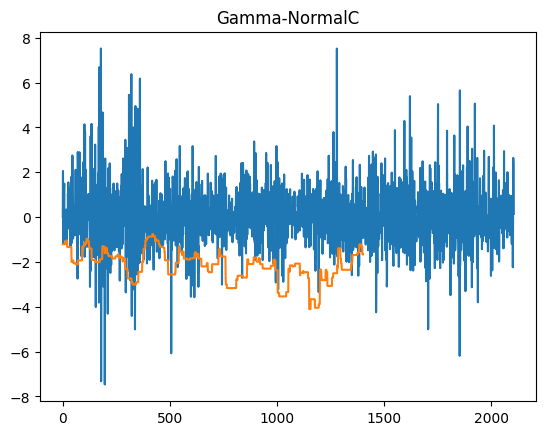

In [75]:
plt.plot(r)
CVaR_RM=CVaR_RM[1:]
plt.plot(CVaR_RM)
plt.title('Gamma-NormalC')
plt.savefig('3.png')
plt.show()


In [48]:
data = pd.DataFrame({'return': r, 'CVaR_RM': CVaR_RM, 'CVaR_GN': CVaR_GN, 'CVaR_HS': CVaR_HS, 'CVaR_EVT': CVaR_EVT})
data.to_csv('Data_CVaR.csv')

ValueError: All arrays must be of the same length